### This code tries to solve the KPCA pre-imaging with added poisson noise

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
from scipy.linalg import svd
from matplotlib import image
from matplotlib import pyplot as plt
import cv2

In [2]:
import os

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split

In [33]:
## image read in loop
#path = '/Users/inii/Desktop/Academic/MATH 123/Research-kPCA/chest_xray/train/NORMAL/'
path = '/Users/yyj/Desktop/math123/final_project/chest_xray/train/NORMAL/'
X = np.zeros((300, 200000))
## number of images
n = 0


for file in os.listdir(path):
    if n < 300:
        image_path = f"{path}{file}"
        #print(str(image_path))
        size = os.path.getsize(image_path)
        if size > 700000:
            #print(str(image_path))
            #image_path = path + str(file)
            #image_path = os.path.join(path, str(file))
            chest = image.imread(image_path)
            chest_cut = chest[600:1000, 500:1000]
            X[n] = chest_cut.reshape((1,200000))
            n = n+1

In [34]:
X
#X # 300 lines, each line is one graph, need to be reshaped

array([[126., 126., 135., ..., 120., 120., 129.],
       [165., 168., 165., ..., 206., 207., 208.],
       [187., 187., 181., ..., 178., 179., 182.],
       ...,
       [144., 145., 148., ..., 207., 213., 215.],
       [118., 116., 115., ..., 209., 210., 209.],
       [105., 107., 108., ..., 192., 190., 190.]])

In [35]:
def image_show(X, title):
    n = X.shape[0]
    """Small helper function to plot xray."""
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(20, 4))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((400, 500)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

## Poisson Noise

In [36]:
## Add poisson noise
from skimage.util import random_noise

In [37]:
raw_data = X

In [38]:
img = raw_data[0].reshape((400,500))

In [39]:
img

array([[126., 126., 135., ..., 106., 101.,  93.],
       [136., 125., 131., ...,  97., 107., 110.],
       [127., 131., 134., ...,  95., 108., 107.],
       ...,
       [148., 146., 162., ..., 123., 121., 133.],
       [149., 152., 158., ..., 136., 129., 140.],
       [150., 149., 155., ..., 120., 120., 129.]])

In [40]:
poissonNoisy = np.random.poisson(img)
img_noisy_poi = img + poissonNoisy
img_noisy_poi

array([[251., 243., 270., ..., 220., 196., 169.],
       [285., 252., 268., ..., 173., 215., 222.],
       [253., 288., 280., ..., 186., 213., 226.],
       ...,
       [300., 278., 309., ..., 238., 253., 276.],
       [296., 307., 318., ..., 288., 256., 286.],
       [300., 307., 315., ..., 238., 242., 269.]])

In [46]:
raw_data

array([[248., 265., 260., ..., 233., 236., 260.],
       [324., 342., 342., ..., 404., 404., 396.],
       [366., 369., 369., ..., 359., 330., 354.],
       ...,
       [273., 308., 303., ..., 425., 417., 443.],
       [248., 227., 238., ..., 422., 421., 393.],
       [197., 209., 232., ..., 405., 423., 404.]])

In [42]:
 X_noisy_poi = X

In [43]:
for i in range(300):
    img = X[i].reshape((400, 500))
    poissonNoisy = np.random.poisson(img)
    img_noisy_poi = img + poissonNoisy
    X_noisy_poi[i] = img_noisy_poi.reshape((1, 200000))
    

In [44]:
X_noisy_poi

array([[248., 265., 260., ..., 233., 236., 260.],
       [324., 342., 342., ..., 404., 404., 396.],
       [366., 369., 369., ..., 359., 330., 354.],
       ...,
       [273., 308., 303., ..., 425., 417., 443.],
       [248., 227., 238., ..., 422., 421., 393.],
       [197., 209., 232., ..., 405., 423., 404.]])

In [45]:
X

array([[248., 265., 260., ..., 233., 236., 260.],
       [324., 342., 342., ..., 404., 404., 396.],
       [366., 369., 369., ..., 359., 330., 354.],
       ...,
       [273., 308., 303., ..., 425., 417., 443.],
       [248., 227., 238., ..., 422., 421., 393.],
       [197., 209., 232., ..., 405., 423., 404.]])

In [14]:
# first split the data into training and testing
X_train_noisy_poi, X_test_noisy_poi = train_test_split(X_noisy_poi, random_state=0, test_size=0.3)

In [23]:
X_noisy_poi

array([[249., 263., 282., ..., 257., 255., 264.],
       [335., 344., 330., ..., 398., 419., 397.],
       [380., 402., 360., ..., 375., 381., 384.],
       ...,
       [297., 301., 268., ..., 424., 433., 439.],
       [227., 244., 233., ..., 400., 427., 422.],
       [197., 227., 226., ..., 384., 387., 380.]])

In [15]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.3)

In [27]:
X_test_noisy_poi

array([[ 81.,  75.,  81., ..., 424., 419., 411.],
       [323., 314., 301., ..., 464., 443., 428.],
       [318., 311., 344., ..., 360., 350., 371.],
       ...,
       [271., 278., 289., ..., 413., 406., 389.],
       [363., 378., 392., ..., 380., 362., 396.],
       [259., 260., 256., ..., 337., 371., 351.]])

In [29]:
X_test

array([[ 81.,  75.,  81., ..., 424., 419., 411.],
       [323., 314., 301., ..., 464., 443., 428.],
       [318., 311., 344., ..., 360., 350., 371.],
       ...,
       [271., 278., 289., ..., 413., 406., 389.],
       [363., 378., 392., ..., 380., 362., 396.],
       [259., 260., 256., ..., 337., 371., 351.]])

In [16]:
#import the algorithm
gaussian_kernel_pca = KernelPCA(n_components=4000, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3)


#learn the data
gaussian_kernel_pca.fit(X_noisy_poi)


#reconstruct the data
gaussian_X_test_denoise_poi = gaussian_kernel_pca.inverse_transform(gaussian_kernel_pca.transform(X_test_noisy_poi))

#calcualte the residual
gaussian_residual_poi = X_test_noisy_poi - gaussian_X_test_denoise_poi

In [17]:
#import the algorithm
sigmoid_kernel_pca = KernelPCA(n_components=4000, kernel="sigmoid", coef0 = 2,fit_inverse_transform=True, alpha=5e-3)

#learn the data
sigmoid_kernel_pca.fit(X_noisy_poi)


#reconstruct the data
sigmoid_X_test_denoise_poi = sigmoid_kernel_pca.inverse_transform(sigmoid_kernel_pca.transform(X_test_noisy_poi))

#calcualte the residual
sigmoid_residual_poi = X_test_noisy_poi - sigmoid_X_test_denoise_poi

In [18]:
#import the algorithm
poly_kernel_pca = KernelPCA(n_components=4000, kernel="poly", gamma=1e-3, degree = 4,fit_inverse_transform=True, alpha=5e-3)


#learn the data
poly_kernel_pca.fit(X_noisy_poi)


#reconstruct the data
poly_X_test_denoise_poi = poly_kernel_pca.inverse_transform(poly_kernel_pca.transform(X_test_noisy_poi))

#calcualte the residual
poly_residual_poi = X_test_noisy_poi - poly_X_test_denoise_poi

In [25]:
poi_noise_residual =  X_test_noisy_poi - X_test
poi_noise_residual

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

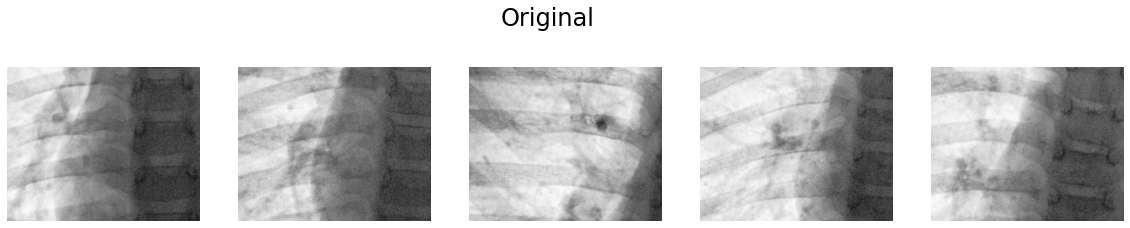

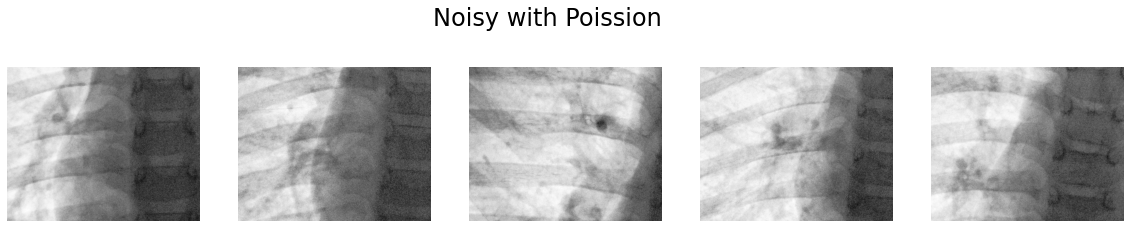

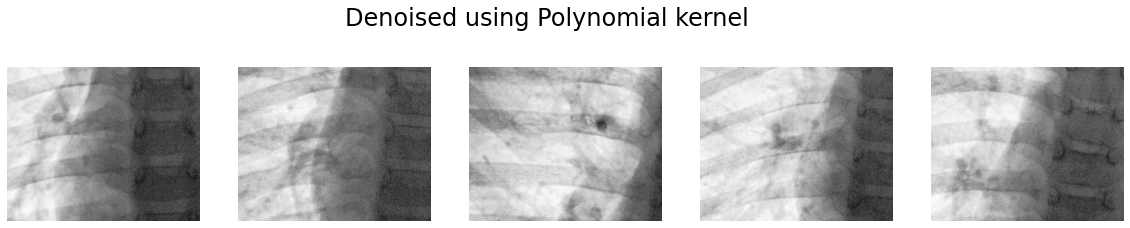

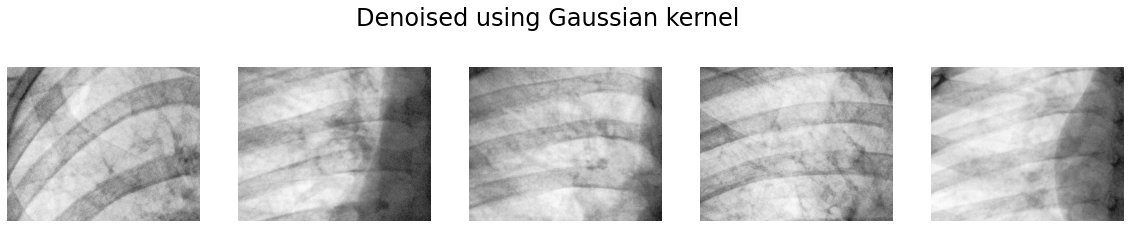

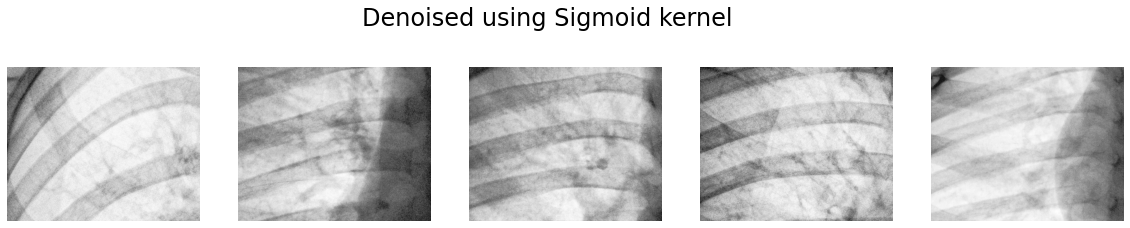

In [22]:
image_show(X_test[0:5], "Original")
image_show(X_test_noisy_poi[0:5], "Noisy with Poission")
image_show(poly_X_test_denoise_poi[0:5],'Denoised using Polynomial kernel')
image_show(gaussian_X_test_denoise_poi[0:5],'Denoised using Gaussian kernel')
image_show(sigmoid_X_test_denoise_poi[0:5],'Denoised using Sigmoid kernel')

In [20]:
print("Polynomial mse:", np.mean(poly_residual_poi)**2)
print("Gaussian mse:", np.mean(gaussian_residual_poi)**2)
print("Sigmoid mse:", np.mean(sigmoid_residual_poi)**2)

Polynomial mse: 1.162486936143629e-21
Gaussian mse: 0.16129434363172787
Sigmoid mse: 0.315956410007711


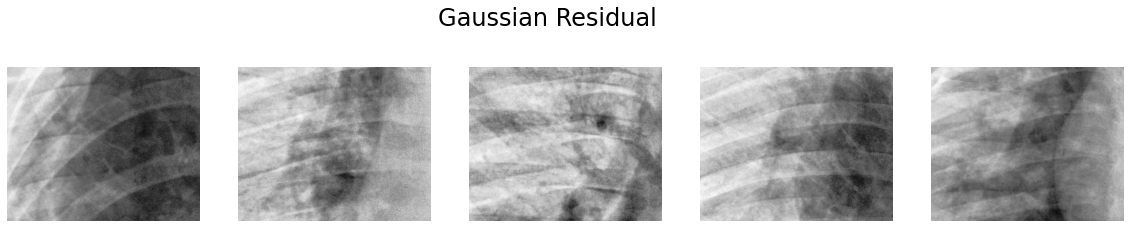

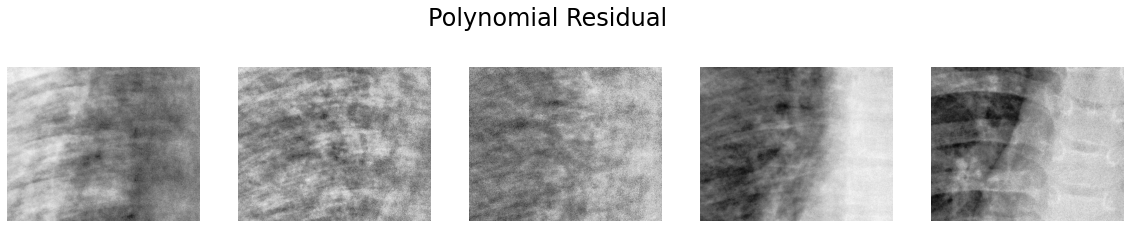

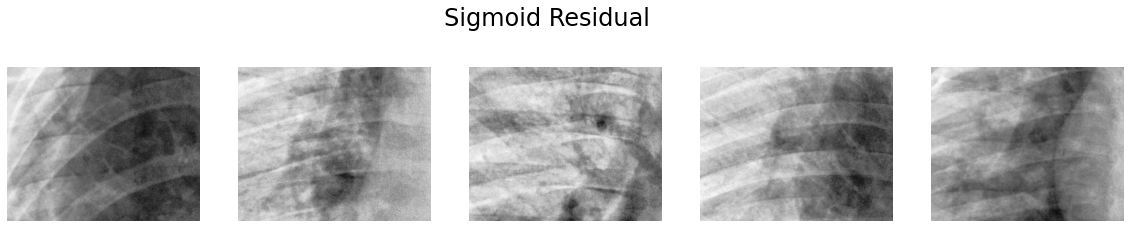

In [21]:
image_show(gaussian_residual_poi[0:5],'Gaussian Residual')
image_show(poly_residual_poi[0:5],'Polynomial Residual')
image_show(sigmoid_residual_poi[0:5],'Sigmoid Residual')